In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/try1/finetune/*.csv")):
    results.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results = pd.concat(results).set_index("index").sort_index()
results

,P1,P2,P3,P4,truth
index,,,,,
0,1.173552e-07,1.854037e-05,9.796494e-01,2.033198e-02,3
1,1.936275e-09,1.430724e-08,9.237450e-09,1.000000e+00,4
2,1.005246e-05,8.416821e-05,4.687464e-01,5.311593e-01,2
3,9.999037e-01,4.993242e-08,9.610239e-05,3.653134e-08,1
4,9.999919e-01,9.329422e-08,7.889265e-06,4.363429e-09,1
...,...,...,...,...,...
1004,7.985451e-06,5.900495e-05,1.066834e-01,8.932496e-01,2
1005,5.430244e-04,1.328737e-01,8.664452e-01,1.372981e-04,2
1006,9.999997e-01,4.944451e-09,2.102434e-07,4.599055e-10,1


In [3]:
results[["P1", "P2", "P3", "P4"]].sum(axis=1).describe()

count    980.000000
mean       0.999991
std        0.000225
min        0.992998
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

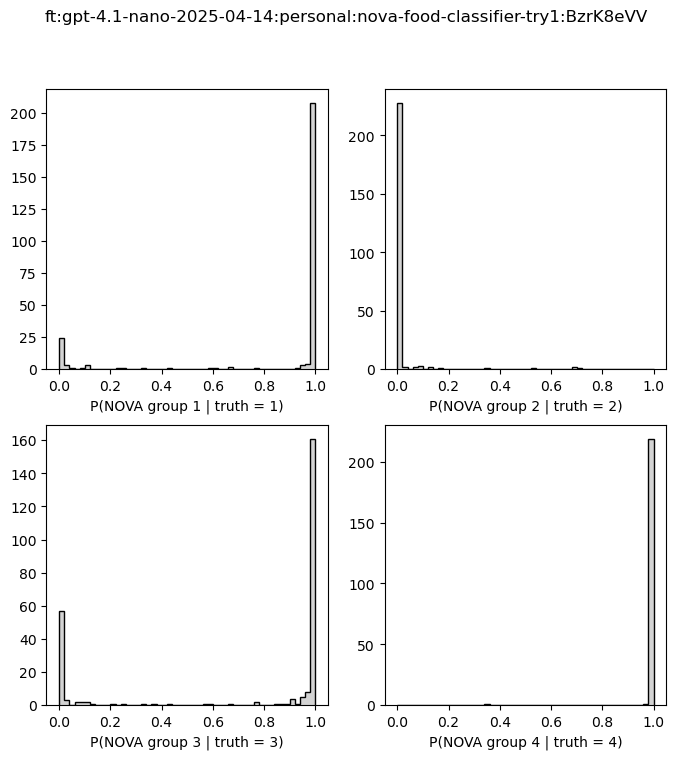

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))

ax1.hist(results.query("truth == 1")["P1"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax1.set_xlabel("P(NOVA group 1 | truth = 1)")

ax2.hist(results.query("truth == 2")["P2"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax2.set_xlabel("P(NOVA group 2 | truth = 2)")

ax3.hist(results.query("truth == 3")["P3"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax3.set_xlabel("P(NOVA group 3 | truth = 3)")

ax4.hist(results.query("truth == 4")["P4"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightgrey", edgecolor="black")
ax4.set_xlabel("P(NOVA group 4 | truth = 4)")

fig.suptitle("ft:gpt-4.1-nano-2025-04-14:personal:nova-food-classifier-try1:BzrK8eVV")

None